In [1]:
import matplotlib.pyplot as plt
from bokeh.plotting import figure, show, output_file
import pandas as pd
import numpy as np
# import matplotlib. as plt


In [2]:
df = pd.read_csv('https://www.saude.pr.gov.br/sites/default/arquivos_restritos/files/documento/2022-01/informe_epidemiologico_21_01_2022_geral.csv', sep=';')
# df_casos = pd.read_csv('https://www.saude.pr.gov.br/sites/default/arquivos_restritos/files/documento/2021-03/informe_epidemiologico_18_03_2021_obitos_casos_municipio.csv', sep=';')   ##Boletim diário
df.head()

/home/patriky/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (12,13,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,IBGE_RES_PR,IBGE_ATEND_PR,UF_RESIDENCIA,SEXO,IDADE_ORIGINAL,MUN_RESIDENCIA,MUN_ATENDIMENTO,LABORATORIO,DATA_DIAGNOSTICO,DATA_CONFIRMACAO_DIVULGACAO,DATA_INICIO_SINTOMAS,OBITO,DATA_OBITO,DATA_OBITO_DIVULGACAO,STATUS,DATA_RECUPERADO_DIVULGACAO,ORIGEM_NOTIFICACAO
0,4106902,4106902,PR,M,81,CURITIBA,CURITIBA,167.0,2022-01-06,2022-01-21,NaN,SIM,2022-01-18,2022-01-21,Óbito,NaN,e-Saúde
1,4112108,4112108,PR,F,81,JANDAIA DO SUL,JANDAIA DO SUL,1.0,2022-01-14,2022-01-21,2022-01-09,SIM,2022-01-20,2022-01-21,Óbito,NaN,Notifica COVID-19
2,4127700,4127700,PR,M,86,TOLEDO,TOLEDO,167.0,2022-01-11,2022-01-21,2022-01-05,SIM,2022-01-20,2022-01-21,Óbito,NaN,Notifica COVID-19
3,4108304,4108304,PR,M,84,FOZ DO IGUACU,FOZ DO IGUACU,184.0,2022-01-19,2022-01-21,NaN,SIM,2022-01-21,2022-01-21,Óbito,NaN,RP Smart - Prefeitura de Foz do Iguaçu
4,4113700,4113700,PR,M,69,LONDRINA,LONDRINA,163.0,2022-01-11,2022-01-21,2022-01-05,SIM,2022-01-18,2022-01-21,Óbito,NaN,Lab. Lab Imagem


In [ ]:
df_obitos = pd.read_csv('https://www.saude.pr.gov.br/sites/default/arquivos_restritos/files/documento/2021-06/informe_epidemiologico_27_06_2021_obitos_casos_municipio.csv')

In [3]:
df_pien = df[df['MUN_RESIDENCIA'] == 'PIEN']
# df_pien.info()
df_pien.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2065 entries, 4091 to 1786889
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   IBGE_RES_PR                  2065 non-null   int64  
 1   IBGE_ATEND_PR                2065 non-null   int64  
 2   UF_RESIDENCIA                2065 non-null   object 
 3   SEXO                         2065 non-null   object 
 4   IDADE_ORIGINAL               2065 non-null   int64  
 5   MUN_RESIDENCIA               2065 non-null   object 
 6   MUN_ATENDIMENTO              2065 non-null   object 
 7   LABORATORIO                  2057 non-null   float64
 8   DATA_DIAGNOSTICO             2065 non-null   object 
 9   DATA_CONFIRMACAO_DIVULGACAO  2065 non-null   object 
 10  DATA_INICIO_SINTOMAS         2000 non-null   object 
 11  OBITO                        1975 non-null   object 
 12  DATA_OBITO                   31 non-null     object 
 13  DATA_OBITO_D

In [4]:
pwd

'/home/patriky/Development/covid-pien/src'

In [5]:
df_pien.to_csv('../junho/covid_pien_21_01_2022.csv', sep=';', index=False)

In [7]:
df_pien[df_pien.isna().any(axis=1)]

,IBGE_RES_PR,IBGE_ATEND_PR,UF_RESIDENCIA,SEXO,IDADE_ORIGINAL,MUN_RESIDENCIA,MUN_ATENDIMENTO,LABORATORIO,DATA_DIAGNOSTICO,DATA_CONFIRMACAO_DIVULGACAO,DATA_INICIO_SINTOMAS,OBITO,DATA_OBITO,DATA_OBITO_DIVULGACAO,STATUS,DATA_RECUPERADO_DIVULGACAO,ORIGEM_NOTIFICACAO
4091,4119103,9999999,PR,M,45,PIEN,IGNORADO/EXTERIOR/IG,27.0,2021-07-28,2021-08-03,2021-07-24,SIM,2021-08-30,2021-08-31,Óbito,NaN,NaN
4137,4119103,9999999,PR,F,34,PIEN,IGNORADO/EXTERIOR/IG,27.0,2021-08-17,2021-08-19,2021-08-08,SIM,2021-08-25,2021-08-30,Óbito,NaN,Notifica COVID-19
4547,4119103,4119103,PR,M,70,PIEN,PIEN,27.0,2021-06-09,2021-08-23,2021-06-02,SIM,2021-06-29,2021-08-23,Óbito,NaN,Notifica COVID-19
5116,4119103,4119103,PR,M,55,PIEN,PIEN,27.0,2021-05-11,2021-05-13,2021-05-06,SIM,2021-06-22,2021-08-15,Óbito,NaN,NaN
5287,4119103,4119103,PR,M,73,PIEN,PIEN,1.0,2021-08-05,2021-08-12,2021-08-04,SIM,2021-08-09,2021-08-13,Óbito,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1747799,4119103,4119103,PR,M,24,PIEN,PIEN,27.0,2020-07-14,2020-07-15,2020-07-12,NÃO,NaN,NaN,Recuperado,2020-07-28,NaN
1752473,4119103,4119103,PR,F,23,PIEN,PIEN,1.0,2020-07-11,2020-07-12,2020-07-08,NÃO,NaN,NaN,Recuperado,2020-07-28,NaN
1779326,4119103,4119103,PR,F,57,PIEN,PIEN,27.0,2020-06-16,2020-06-17,2020-06-09,NÃO,NaN,NaN,Recuperado,NaN,NaN
1779541,4119103,4119103,PR,M,40,PIEN,PIEN,27.0,2020-06-16,2020-06-16,2020-06-09,NÃO,NaN,NaN,Recuperado,NaN,NaN


In [10]:
df_pien.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2065 entries, 4091 to 1786889
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   IBGE_RES_PR                  2065 non-null   int64  
 1   IBGE_ATEND_PR                2065 non-null   int64  
 2   UF_RESIDENCIA                2065 non-null   object 
 3   SEXO                         2065 non-null   object 
 4   IDADE_ORIGINAL               2065 non-null   int64  
 5   MUN_RESIDENCIA               2065 non-null   object 
 6   MUN_ATENDIMENTO              2065 non-null   object 
 7   LABORATORIO                  2057 non-null   float64
 8   DATA_DIAGNOSTICO             2065 non-null   object 
 9   DATA_CONFIRMACAO_DIVULGACAO  2065 non-null   object 
 10  DATA_INICIO_SINTOMAS         2000 non-null   object 
 11  OBITO                        2065 non-null   object 
 12  DATA_OBITO                   31 non-null     object 
 13  DATA_OBITO_D

# Tratando os dados Nulos e datas

In [17]:
# Preenchendo valores NaN
df_pien['MUN_ATENDIMENTO'] = df_pien['MUN_ATENDIMENTO'].fillna("Não informado")
df_pien['OBITO'] = df_pien['OBITO'].fillna("Não informado")
df_pien['STATUS'] = df_pien['STATUS'].fillna("Não informado")


# # Alterando os campos do tipo datetime
# df_pien['DATA_DIAGNOSTICO'] = pd.to_datetime(df_pien['DATA_DIAGNOSTICO'], format='%Y%m%d')
# df_pien['DATA_CONFIRMACAO_DIVULGACAO'] = pd.to_datetime(df_pien['DATA_CONFIRMACAO_DIVULGACAO'], format='%Y%m%d')
# df_pien['DATA_INICIO_SINTOMAS'] = pd.to_datetime(df_pien['DATA_INICIO_SINTOMAS'], format='%Y%m%d')
# df_pien['DATA_OBITO'] = pd.to_datetime(df_pien['DATA_OBITO'], format='%Y%m%d')
# df_pien['DATA_OBITO_DIVULGACAO'] = pd.to_datetime(df_pien['DATA_OBITO_DIVULGACAO'], format='%Y%m%d')
# df_pien['DATA_RECUPERADO_DIVULGACAO'] = pd.to_datetime(df_pien['DATA_RECUPERADO_DIVULGACAO'], format='%Y%m%d')


<ipython-input-17-91373aff1cbb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pien['MUN_ATENDIMENTO'] = df_pien['MUN_ATENDIMENTO'].fillna("Não informado")
<ipython-input-17-91373aff1cbb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pien['OBITO'] = df_pien['OBITO'].fillna("Não informado")
<ipython-input-17-91373aff1cbb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [18]:
# Verifica a quantidade de nan em cada coluna
df_pien.isnull().sum()

IBGE_RES_PR                       0
IBGE_ATEND_PR                     0
UF_RESIDENCIA                     0
SEXO                              0
IDADE_ORIGINAL                    0
MUN_RESIDENCIA                    0
MUN_ATENDIMENTO                   0
LABORATORIO                       8
DATA_DIAGNOSTICO                  0
DATA_CONFIRMACAO_DIVULGACAO       0
DATA_INICIO_SINTOMAS             65
OBITO                             0
DATA_OBITO                     2034
DATA_OBITO_DIVULGACAO          2034
STATUS                            0
DATA_RECUPERADO_DIVULGACAO      124
ORIGEM_NOTIFICACAO             1754
dtype: int64

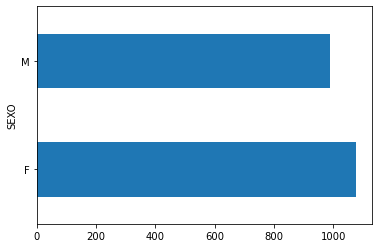

In [13]:
df_pien['SEXO'].groupby(df_pien.SEXO).count().plot.barh()

In [19]:
# df_pien['ANO'] = df_pien['DATA_CONFIRMACAO_DIVULGACAO'].dt.year
# df_pien['MES'] = df_pien['DATA_CONFIRMACAO_DIVULGACAO'].dt.month
df_pien['MES_ANO'] = df_pien['DATA_CONFIRMACAO_DIVULGACAO'].dt.to_period('M')

AttributeError: Can only use .dt accessor with datetimelike values

In [22]:
# pien_2021 = df_pien[df_pien['ANO'] == 2021]
# pien_2021.head()

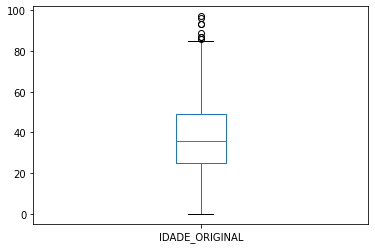

In [25]:
df_pien['IDADE_ORIGINAL'].plot.box()